# CSE474/574 - Programming Assignment 1

For grading, we will execute the submitted notebook as follows:

```shell
jupyter nbconvert --to python PA1Script.ipynb
python PA1Script.py
```

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle
import math
import random

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [69]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [4]:
def learnOLERegression(Xtrain,ytrain):
#    print(Xtrain)
#    print("------------")
#    A=np.array(Xtrain)
   A = Xtrain
   B = ytrain
#    B=np.array(ytrain)
   At =np.transpose(A)
   AtA=np.dot(At,A)
   AtA_Inverse=np.linalg.inv(AtA)
   AtA_InverseAt=np.dot(np.linalg.inv(AtA),At)
   w=np.dot(AtA_InverseAt,B)
   return w

In [57]:
def testOLERegression(w,Xtest,ytest):
#     print(Xtest)
#     A=np.array(Xtest)
#     print(len(A))
#     B=np.array(ytest)
    A = Xtest
    B = ytest
    wt=np.transpose(w)
#     Xw =  np.dot(Xtest,w)
#     y_XW = np.subtract(ytest,Xw)
#     y_XWT = np.transpose(y_XW)
#     loss = np.dot(y_XWT,y_XW)
#     print(loss)
    sum=0
#     print(len(A[0]))
    for i in range(0,len(A)):
#      print(wt.shape)
#      print(A[i].shape)
     wtxi=np.dot(wt,A[i])
#      print(A[i])
#      print(wt)
#      print(wtxi)
     yiwtxi=np.subtract(B[i],wtxi)
     yiwtxi2=np.square(yiwtxi)
#      print(yiwtxi2)
     sum=sum+yiwtxi2[0]
#     print(sum)
    average=sum/len(A)
    rmse=math.sqrt(average)
    return rmse


In [58]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)
# print(np.size(w_i))
# print(w)
# print(w_i)
rmse = testOLERegression(w,Xtrain,ytrain)

rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [ ]:
print('PROBLEM 2')
print('----------')

In [59]:
def regressionObjVal(w, X, y):
    w=np.matrix(w)
    w=w.transpose()
    A=np.dot(X,w)
    B=np.subtract(y,A)
    Bt=B.transpose()
    e=np.dot(Bt,B)
    E=0.5*e
    error=E[0,0]
    return error


In [60]:
def regressionGradient(w, X, y):

    AT = X.transpose()
    ATA = np.dot(AT,X)

    w=np.matrix(w)
    w=w.transpose()
    ATAW = np.dot(ATA,w)

    ATB = np.dot(AT,y)
    deltaJ = np.subtract(ATAW,ATB) 
    error_grad = np.squeeze(np.asarray(deltaJ))
    return error_grad

In [61]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 47.99
Gradient Descent Linear Regression RMSE on test data - 54.95


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [ ]:
print('PROBLEM 3')
print('----------')

In [62]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle
import math
import random

In [64]:
def predictLinearModel(w,Xtest):
    wt = np.transpose(w)
    ypred = []
    for i in range(len(Xtest)):
        wtxi = np.dot(wt,Xtest[i])
        if(wtxi > 0 or wtxi == 0):
            ypred.append(1)
        else:
            ypred.append(-1)
    ypred = np.array(ypred)
    ypred = ypred.reshape(len(Xtest), 1)
    return ypred

In [65]:
def evaluateLinearModel(w,Xtest,ytest):
    pred = predictLinearModel(w,Xtest)
    ytest= np.squeeze(np.asarray(ytest))
    ypred= np.squeeze(np.asarray(pred))
    match=0
    for i in range(len(ypred)):
      if ytest[i]==ypred[i]:
        match=match+1
    acc= match/len(ypred)
    return acc

In [66]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 0.84
Perceptron Accuracy on test data - 0.84


### Problem 4 - Logistic Regression Using Newton's Method

In [ ]:
print('PROBLEM 4')
print('----------')

In [67]:
def logisticObjVal(w, X, y):
    n = len(X)
    wt = np.matrix(w)
    sum = 0
    for i in range(len(X)):
        wtx = np.dot(wt,X[i])
        ywtx = np.dot(-y[i],wtx)
        ywtx = np.squeeze(np.asarray(ywtx))
        expt = math.exp(ywtx)
        logt = math.log(1+expt)
        sum = sum+logt
    error = sum/len(X)
    if len(w.shape) == 1:
        w = w[:,np.newaxis]

    return error


In [68]:
def logisticGradient(w, X, y):
    n = len(X)
    
    wt = np.matrix(w)
    y= np.squeeze(np.asarray(y))
    sum = 0
    for i in range(len(X)):
        wtx = np.dot(wt,X[i])
        ywtx = np.dot(y[i],wtx)
        expt = 1 + math.exp(ywtx) 
        expt = np.squeeze(np.asarray(expt))
        yi = y[i] / expt
        num = np.dot(yi,X[i])
        sum = sum +num
    gradient = sum*(-1/n)
    if len(w.shape) == 1:
        w = w[:,np.newaxis]   
    return gradient

In [71]:
def logisticHessian(w, X, y):
    n = len(X)
    
    wt = np.matrix(w)
    sum = 0
    for i in range(len(X)):
        xi = np.matrix(X[i])
        xi = np.reshape(xi,(len(X[0]),1))
        wtx = np.dot(wt,xi)
        wtx2 = np.dot(wt,X[i])
        ywtx = np.dot(y[i],wtx)
        exp =  math.exp(ywtx) 
        xxt = np.dot(xi,np.transpose(xi))
        denom = (1+exp)**2
        sum = sum+exp/denom*xxt
    hessian = sum / n
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    return hessian

In [72]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

Logistic Regression Accuracy on train data - 0.84
Logistic Regression Accuracy on test data - 0.86


### Problem 5 - Support Vector Machines Using Gradient Descent

In [ ]:
print('PROBLEM 5')
print('----------')

In [73]:
def trainSGDSVM(X,y,T,eta=0.01):
    w = np.zeros(len(X[0]))
    wt = np.transpose(w)
    for j in range(T):
        i = random.randint(0,len(X)-1)
        wtxi = np.dot(wt,X[i])
        ywtxi = y[i]*wtxi
        if(ywtxi<1):
            yixi = y[i]*X[i]
            w = w+eta*yixi

    return w

In [74]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,100,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 0.85
SVM Accuracy on test data - 0.86


### Problem 6 - Plotting decision boundaries

In [ ]:
print('Problem 6')
print('---------')

In [75]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5, 1.0, 'SVM')

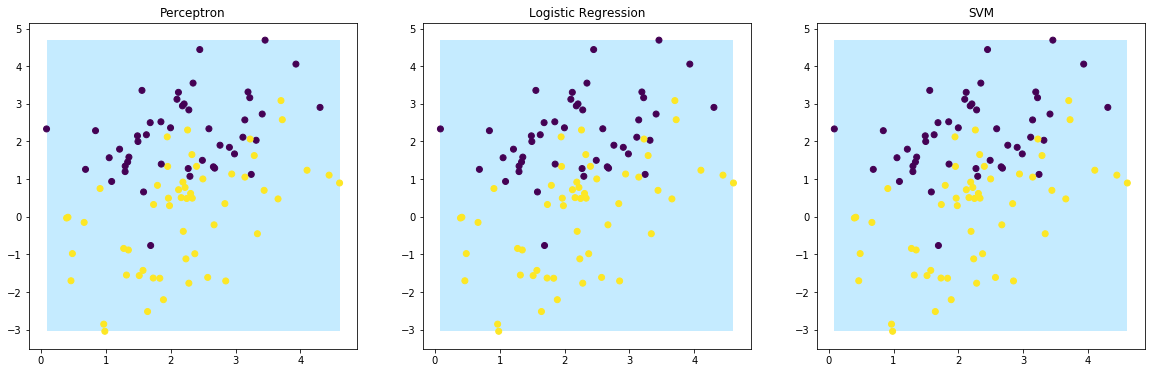

In [76]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
w_perceptron = np.zeros((Xtrain_i.shape[1],1))
w_logistic = np.zeros((Xtrain_i.shape[1],1))
w_svm = np.zeros((Xtrain_i.shape[1],1))
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
